In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,roc_curve
%matplotlib inline

C:\Users\Lenovo\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
path= os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
part4=pd.read_csv(path,delimiter=',')

In [42]:
part4_binary=part4.copy(deep=True)
part4_binary['alg_1']=[0 if part4['alg_1'][i]<0.5 else 1 for i in range (1000)]
part4_binary['alg_2']=[0 if part4['alg_2'][i]<0.5 else 1 for i in range (1000)]
part4_binary['alg_3']=[0 if part4['alg_3'][i]<0.5 else 1 for i in range (1000)]
part4_binary['alg_4']=[0 if part4['alg_4'][i]<0.5 else 1 for i in range (1000)]
print(len([i for i in range (1000) if part4_binary['alg_1'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_2'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_3'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_4'][i]==part4['gt'][i]]))

616
550
321
329


In [46]:
print(roc_auc_score(part4['gt'],part4['alg_1']))
print(roc_auc_score(part4['gt'],part4['alg_2']))
print(roc_auc_score(part4['gt'],part4['alg_3']))
print(roc_auc_score(part4['gt'],part4['alg_4']))

0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644


In [48]:
part4

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736
5,0,1.000000,0.000000,0.493186,0.769017
6,0,0.897370,1.000000,0.261861,0.987711
7,0,0.236050,1.000000,0.687067,0.826789
8,0,0.219094,0.131004,0.502369,0.712532
9,0,0.000000,1.000000,1.000000,0.407349


[2.00000000e+00 1.00000000e+00 9.97090318e-01 9.93053500e-01
 9.92621152e-01 9.78165832e-01 9.77130768e-01 9.76375330e-01
 9.67176205e-01 9.63889703e-01 9.49563150e-01 9.43951786e-01
 9.37774271e-01 9.36021107e-01 9.32171942e-01 9.31317478e-01
 9.30412101e-01 9.15962129e-01 9.13855633e-01 9.12446975e-01
 9.12031572e-01 9.09521430e-01 9.07179511e-01 9.00195550e-01
 9.00083858e-01 8.95527784e-01 8.95210804e-01 8.93520928e-01
 8.93123644e-01 8.87320550e-01 8.86555671e-01 8.84283232e-01
 8.82340937e-01 8.77370693e-01 8.75086131e-01 8.72626913e-01
 8.72335844e-01 8.70147364e-01 8.67007364e-01 8.60916589e-01
 8.60451513e-01 8.60085512e-01 8.58309603e-01 8.57338686e-01
 8.56250617e-01 8.42655423e-01 8.39071972e-01 8.34543474e-01
 8.33827253e-01 8.31258048e-01 8.28596962e-01 8.25531626e-01
 8.25300834e-01 8.25084545e-01 8.18012563e-01 8.15772904e-01
 8.13805950e-01 8.05518230e-01 8.04814873e-01 8.02281306e-01
 7.98371871e-01 7.96695164e-01 7.95246440e-01 7.94633095e-01
 7.93493671e-01 7.838840

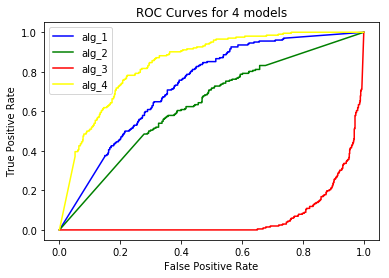

In [8]:
colors=['blue','green','red','yellow']
for i in [1,2,3,4]:
    fpr,tpr,thresholds=roc_curve(part4['gt'],part4['alg_'+str(i)])
    plt.plot(fpr,tpr,color=colors[i-1],label='alg_'+str(i))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 4 models')
plt.legend()
plt.show()


In [6]:
part4_binary=part4.copy(deep=True)
part4_binary['alg_1']=[0 if part4['alg_1'][i]<0.5 else 1 for i in range (1000)]
part4_binary['alg_2']=[0 if part4['alg_2'][i]<0.5 else 1 for i in range (1000)]
part4_binary['alg_3']=[0 if part4['alg_3'][i]<0.6 else 1 for i in range (1000)]
part4_binary['alg_4']=[0 if part4['alg_4'][i]<0.5 else 1 for i in range (1000)]
print(len([i for i in range (1000) if part4_binary['alg_1'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_2'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_3'][i]==part4['gt'][i]]))
print(len([i for i in range (1000) if part4_binary['alg_4'][i]==part4['gt'][i]]))

616
550
408
329
